In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import json
import os

In [61]:
def simulate_round(lambda_param, num_nodes):
    nodes_avilability = np.random.poisson(lambda_param, size=num_nodes)
    # return the nodes that have 0 in nodes_avilability
    return nodes_avilability, np.where(nodes_avilability > 0)[0]

In [69]:
lambda_param = 0.1
total_duration = 18
num_nodes = 10

In [63]:
np.random.seed(0)
availability_history = []
timestamps = {}
curr_time = 0
for i in range(total_duration):
    round_availability, failed_nodes = simulate_round(lambda_param, num_nodes)
    # print(round_availability, failed_nodes)
    availability_history.append(round_availability)
    for node in failed_nodes:
        if node not in timestamps:
            timestamps[node] = []
        timestamps[node].append(curr_time + i*300)

availability_array = np.array(availability_history)

In [64]:
# convert timestamps to each key having a list of tuples (time, duration) where consecutive failures are combined
timestamps_combined = {}
for node in timestamps:
    file_name = f"trainer_{node+1}.json"
    timestamps_combined[file_name] = []
    curr_start = timestamps[node][0]
    curr_end = curr_start
    for i in range(1, len(timestamps[node])):
        if timestamps[node][i] == curr_end + 300:
            curr_end += 300
        else:
            timestamps_combined[file_name].append((curr_start, curr_end - curr_start + 300))
            curr_start = timestamps[node][i]
            curr_end = curr_start
    timestamps_combined[file_name].append((curr_start, curr_end - curr_start + 300))

In [65]:
timestamps_combined["trainer_6.json"]

[(360, 60),
 (780, 60),
 (2040, 60),
 (2160, 60),
 (2400, 60),
 (2520, 60),
 (2820, 60),
 (3060, 60),
 (4860, 60),
 (5280, 60)]

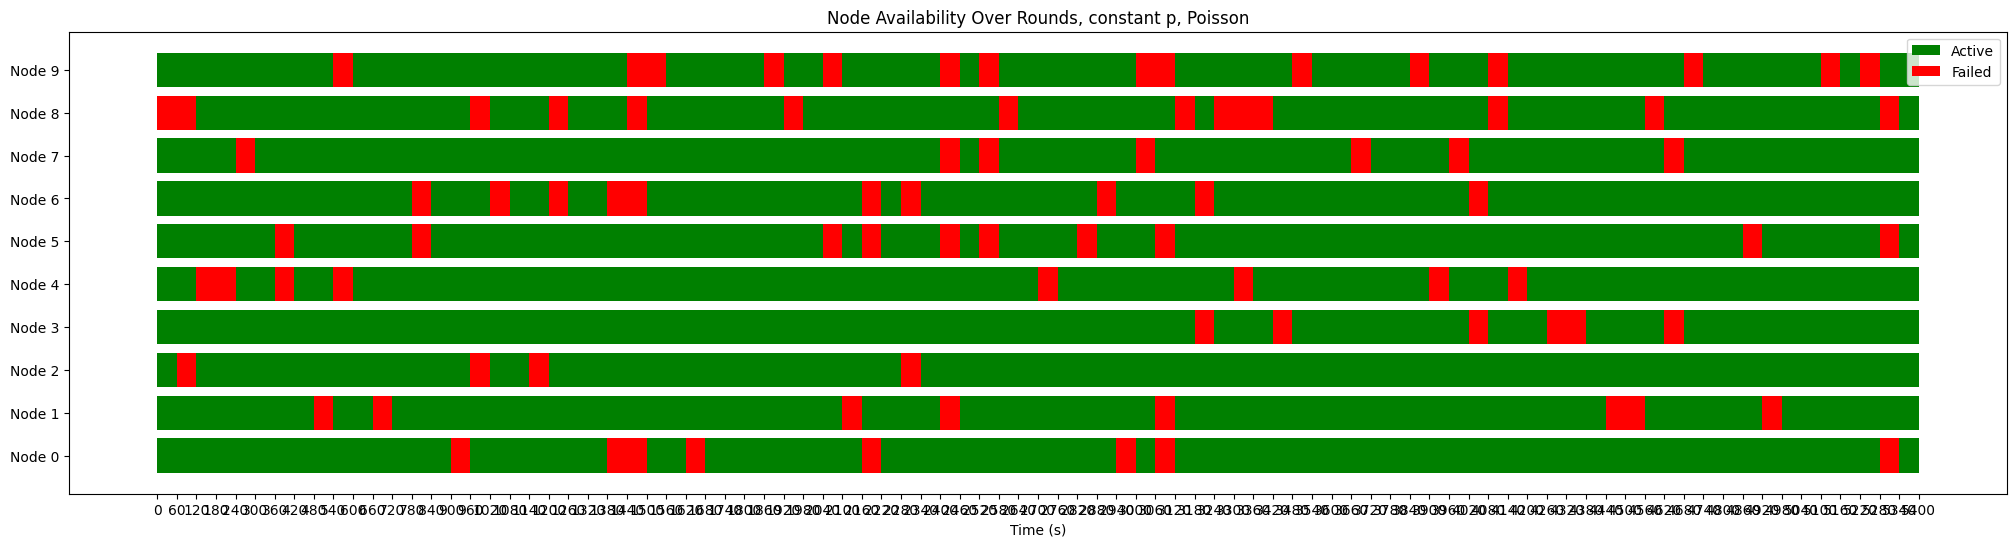

In [66]:
fig, ax = plt.subplots(figsize=(25, 6))

for node_num in range(num_nodes):
    availability = availability_array[:, node_num]
    ax.broken_barh([(i*60, 60) for i, val in enumerate(availability) if val == 0], (node_num - 0.4, 0.8), facecolors='green')#, edgecolors='black', alpha=0.7)
    ax.broken_barh([(i*60, 60) for i, val in enumerate(availability) if val > 0], (node_num - 0.4, 0.8), facecolors='red')#, edgecolors='black', alpha=0.7)

ax.set_yticks(np.arange(num_nodes))
ax.set_yticklabels([f'Node {i}' for i in range(num_nodes)])
ax.set_xticks(np.arange((total_duration+1))*60)
ax.set_xlabel('Time (s)')
ax.set_title('Node Availability Over Rounds, constant p, Poisson')
ax.legend(['Active', 'Failed'])
plt.savefig('lambda-0.1-1min.png')
plt.show()

In [68]:
dir_path = f"../lib/python/examples/async_cifar10/trainer/config15_lambda_{lambda_param}_1min/"

for file_name, timestamps in timestamps_combined.items():
    file_path = os.path.join(dir_path, file_name)
    
    # Check if the file exists
    if os.path.exists(file_path):
        with open(file_path, "r") as f:
            data = json.load(f)
        
        # Update the field inside hyperparameters
        if "hyperparameters" in data:
            data["hyperparameters"]["failure_durations_s"] = str(timestamps)
        
        # Save the updated JSON file
        with open(file_path, "w") as f:
            json.dump(data, f, indent=4)
    else:
        print(f"File {file_name} not found!")

In [12]:
lambda_param = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8 ,1.9, 2.0]
num_rounds = 20
num_nodes = 10
availability_history = []

for i in range(num_rounds):
    round_availability = simulate_round(lambda_param[i],10)
    availability_history.append(round_availability)

availability_array = np.array(availability_history)

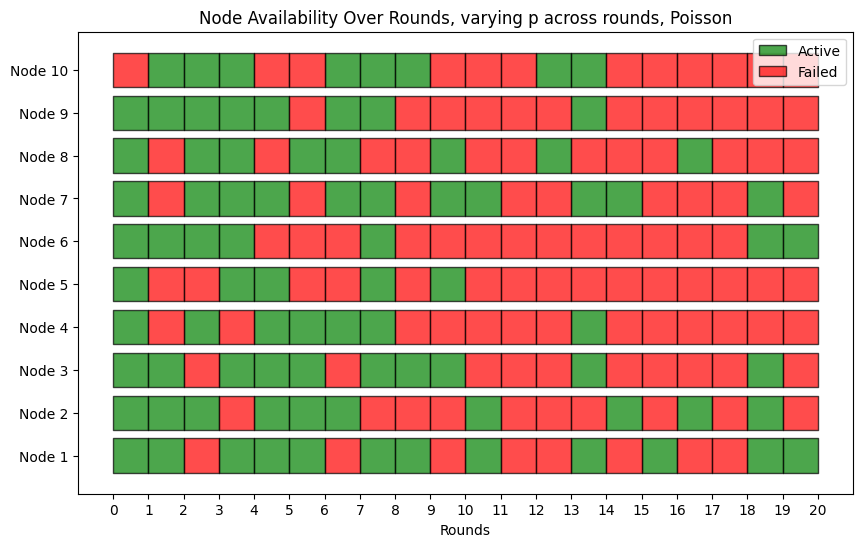

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

for node_num in range(num_nodes):
    availability = availability_array[:, node_num]
    ax.broken_barh([(i, 1) for i, val in enumerate(availability) if val == 0], (node_num - 0.4, 0.8), facecolors='green', edgecolors='black', alpha=0.7)
    ax.broken_barh([(i, 1) for i, val in enumerate(availability) if val > 0], (node_num - 0.4, 0.8), facecolors='red', edgecolors='black', alpha=0.7)

ax.set_yticks(np.arange(num_nodes))
ax.set_yticklabels([f'Node {i+1}' for i in range(num_nodes)])
ax.set_xticks(np.arange(num_rounds+1))
ax.set_xlabel('Rounds')
ax.set_title('Node Availability Over Rounds, varying p across rounds, Poisson')
ax.legend(['Active', 'Failed'])
plt.show()

In [14]:
lambda_param = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
num_rounds = 20
num_nodes = 10
availability_history = []

for i in range(num_nodes):
    round_availability = simulate_round(lambda_param[i],20)
    availability_history.append(round_availability)

availability_array = np.array(availability_history)

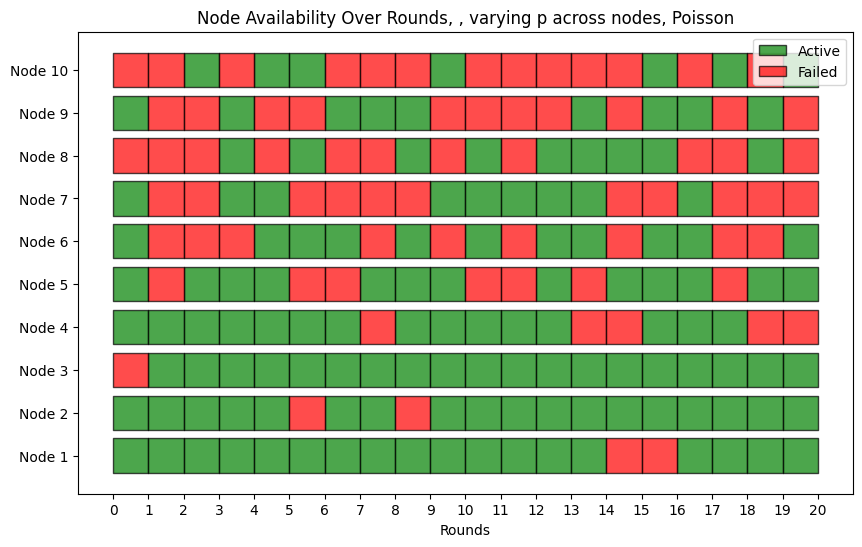

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

for node_num in range(num_nodes):
    availability = availability_array[node_num, :]
    ax.broken_barh([(i, 1) for i, val in enumerate(availability) if val == 0], (node_num - 0.4, 0.8), facecolors='green', edgecolors='black', alpha=0.7)
    ax.broken_barh([(i, 1) for i, val in enumerate(availability) if val > 0], (node_num - 0.4, 0.8), facecolors='red', edgecolors='black', alpha=0.7)

ax.set_yticks(np.arange(num_nodes))
ax.set_yticklabels([f'Node {i+1}' for i in range(num_nodes)])
ax.set_xticks(np.arange(num_rounds+1))
ax.set_xlabel('Rounds')
ax.set_title('Node Availability Over Rounds, , varying p across nodes, Poisson')
ax.legend(['Active', 'Failed'])
plt.show()

In [10]:
lambda_param = np.arange(0.1, 10.05, 0.05)
num_rounds = 20
num_nodes = 10
availability_history = []

for i in range(num_rounds):
    this_round = []
    for j in range(num_nodes):
        round_availability = simulate_round(lambda_param[10*i+j-1],1)
        this_round.append(round_availability)
    
    availability_history.append(this_round)

availability_array = np.array(availability_history)

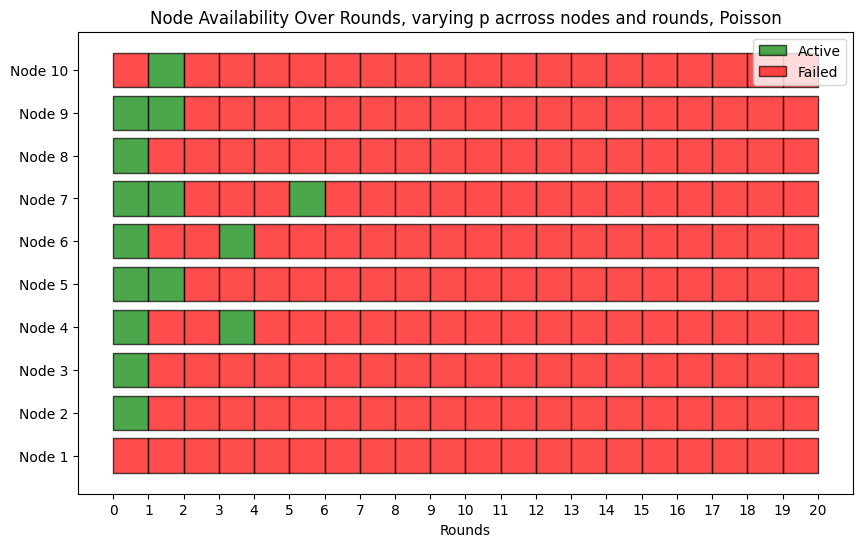

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

for node_num in range(num_nodes):
    availability = availability_array[:, node_num]
    ax.broken_barh([(i, 1) for i, val in enumerate(availability) if val == 0], (node_num - 0.4, 0.8), facecolors='green', edgecolors='black', alpha=0.7)
    ax.broken_barh([(i, 1) for i, val in enumerate(availability) if val > 0], (node_num - 0.4, 0.8), facecolors='red', edgecolors='black', alpha=0.7)

ax.set_yticks(np.arange(num_nodes))
ax.set_yticklabels([f'Node {i+1}' for i in range(num_nodes)])
ax.set_xticks(np.arange(num_rounds+1))
ax.set_xlabel('Rounds')
ax.set_title('Node Availability Over Rounds, varying p acrross nodes and rounds, Poisson')
ax.legend(['Active', 'Failed'])
plt.show()

In [12]:
np.random.binomial(1, 0.5, 10)

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [13]:
def simulate_round(probability, num_nodes):
    return np.random.binomial(1, probability, size=num_nodes)

In [26]:
lambda_param = 0.1 
num_rounds = 20
num_nodes = 10
availability_history = []

In [27]:
for _ in range(num_rounds):
    round_availability = simulate_round(lambda_param, 10)
    availability_history.append(round_availability)

availability_array = np.array(availability_history)

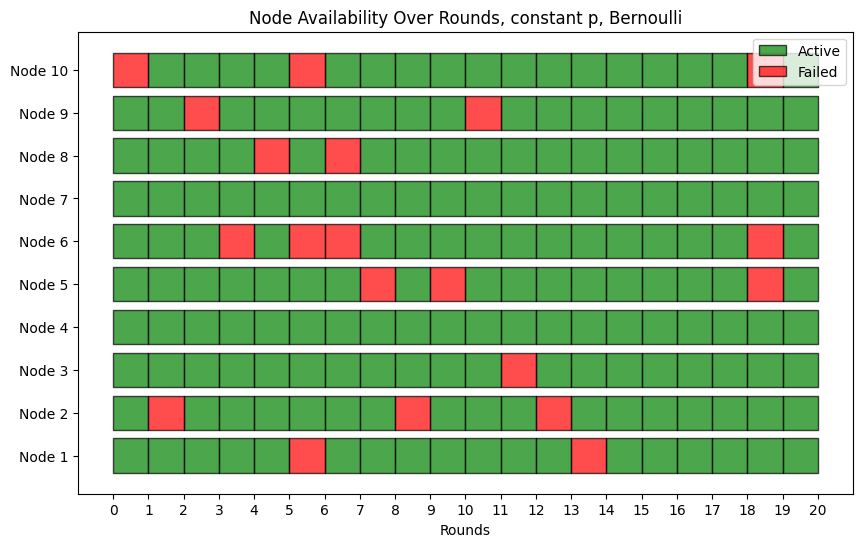

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))

for node_num in range(num_nodes):
    availability = availability_array[:, node_num]
    ax.broken_barh([(i, 1) for i, val in enumerate(availability) if val == 0], (node_num - 0.4, 0.8), facecolors='green', edgecolors='black', alpha=0.7)
    ax.broken_barh([(i, 1) for i, val in enumerate(availability) if val > 0], (node_num - 0.4, 0.8), facecolors='red', edgecolors='black', alpha=0.7)

ax.set_yticks(np.arange(num_nodes))
ax.set_yticklabels([f'Node {i+1}' for i in range(num_nodes)])
ax.set_xticks(np.arange(num_rounds+1))
ax.set_xlabel('Rounds')
ax.set_title('Node Availability Over Rounds, constant p, Bernoulli')
ax.legend(['Active', 'Failed'])
plt.show()

In [17]:
lambda_param = np.arange(0.05, 1.05, 0.05)
num_rounds = 20
num_nodes = 10
availability_history = []

for i in range(num_rounds):
    round_availability = simulate_round(lambda_param[i],10)
    availability_history.append(round_availability)

availability_array = np.array(availability_history)

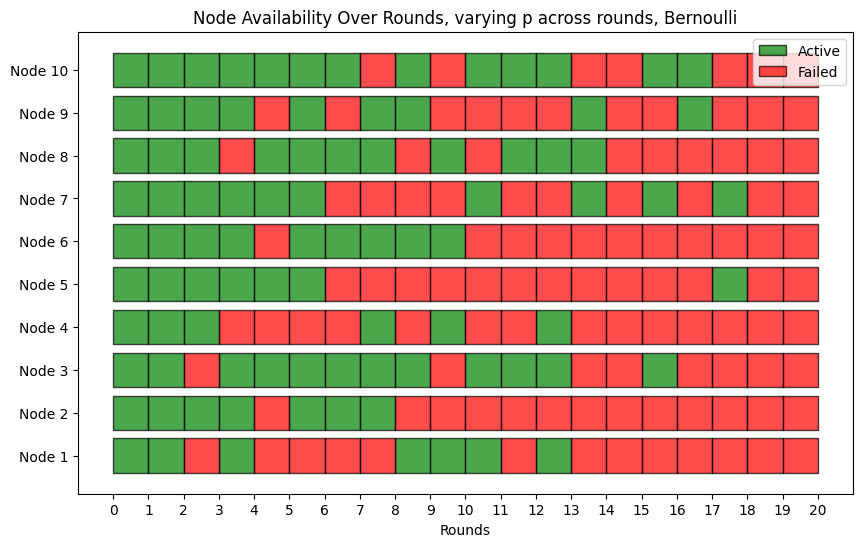

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

for node_num in range(num_nodes):
    availability = availability_array[:, node_num]
    ax.broken_barh([(i, 1) for i, val in enumerate(availability) if val == 0], (node_num - 0.4, 0.8), facecolors='green', edgecolors='black', alpha=0.7)
    ax.broken_barh([(i, 1) for i, val in enumerate(availability) if val > 0], (node_num - 0.4, 0.8), facecolors='red', edgecolors='black', alpha=0.7)

ax.set_yticks(np.arange(num_nodes))
ax.set_yticklabels([f'Node {i+1}' for i in range(num_nodes)])
ax.set_xticks(np.arange(num_rounds+1))
ax.set_xlabel('Rounds')
ax.set_title('Node Availability Over Rounds, varying p across rounds, Bernoulli')
ax.legend(['Active', 'Failed'])
plt.show()

In [19]:
lambda_param = np.arange(0.1,1.1,0.1)
num_rounds = 20
num_nodes = 10
availability_history = []

for i in range(num_nodes):
    round_availability = simulate_round(lambda_param[i],20)
    availability_history.append(round_availability)

availability_array = np.array(availability_history)

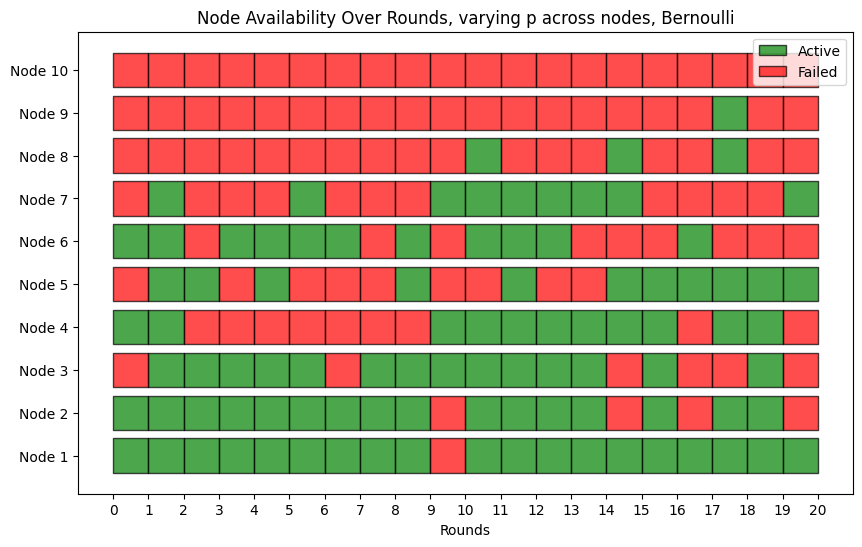

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))

for node_num in range(num_nodes):
    availability = availability_array[node_num, :]
    ax.broken_barh([(i, 1) for i, val in enumerate(availability) if val == 0], (node_num - 0.4, 0.8), facecolors='green', edgecolors='black', alpha=0.7)
    ax.broken_barh([(i, 1) for i, val in enumerate(availability) if val > 0], (node_num - 0.4, 0.8), facecolors='red', edgecolors='black', alpha=0.7)

ax.set_yticks(np.arange(num_nodes))
ax.set_yticklabels([f'Node {i+1}' for i in range(num_nodes)])
ax.set_xticks(np.arange(num_rounds+1))
ax.set_xlabel('Rounds')
ax.set_title('Node Availability Over Rounds, varying p across nodes, Bernoulli')
ax.legend(['Active', 'Failed'])
plt.show()

In [21]:
lambda_param = np.arange(0.005, 1.005, 0.005)
num_rounds = 20
num_nodes = 10
availability_history = []

for i in range(num_rounds):
    this_round = []
    for j in range(num_nodes):
        round_availability = simulate_round(lambda_param[10*i+j-1],1)
        this_round.append(round_availability)
    
    availability_history.append(this_round)

availability_array = np.array(availability_history)

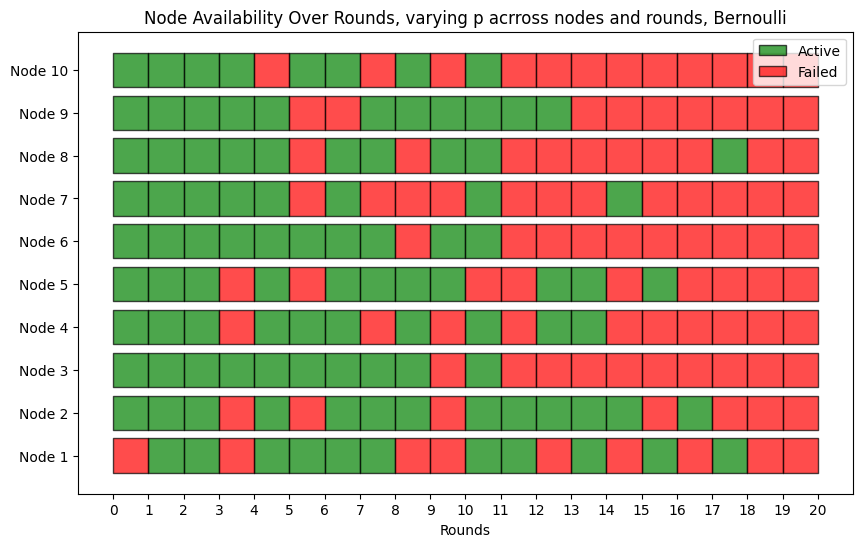

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))

for node_num in range(num_nodes):
    availability = availability_array[:, node_num]
    ax.broken_barh([(i, 1) for i, val in enumerate(availability) if val == 0], (node_num - 0.4, 0.8), facecolors='green', edgecolors='black', alpha=0.7)
    ax.broken_barh([(i, 1) for i, val in enumerate(availability) if val > 0], (node_num - 0.4, 0.8), facecolors='red', edgecolors='black', alpha=0.7)

ax.set_yticks(np.arange(num_nodes))
ax.set_yticklabels([f'Node {i+1}' for i in range(num_nodes)])
ax.set_xticks(np.arange(num_rounds+1))
ax.set_xlabel('Rounds')
ax.set_title('Node Availability Over Rounds, varying p acrross nodes and rounds, Bernoulli')
ax.legend(['Active', 'Failed'])
plt.show()

In [8]:
import torch
import torchvision
import torchvision.transforms as transforms

In [9]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 50000

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=False, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [15]:
class_dict = {}
for _,label in trainloader:
    for i in range(len(label)):
        if f"trainer_{label[i].item()+1}.json" not in class_dict:
            class_dict[f"trainer_{label[i].item()+1}.json"] = [i]
        else:
            class_dict[f"trainer_{label[i].item()+1}.json"].append(i)

In [19]:
dir_path = f"../lib/python/examples/async_cifar10/trainer/config16/"

for file_name, indices in class_dict.items():
    file_path = os.path.join(dir_path, file_name)
    
    # Check if the file exists
    if os.path.exists(file_path):
        with open(file_path, "r") as f:
            data = json.load(f)
        
        # Update the field inside hyperparameters
        if "hyperparameters" in data:
            data["hyperparameters"]["trainer_indices_list"] = indices
        
        # Save the updated JSON file
        with open(file_path, "w") as f:
            json.dump(data, f, indent=4)
    else:
        print(f"File {file_name} not found!")